<a href="https://colab.research.google.com/github/ShubhamJadhav03/AIML/blob/main/GPU_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [2]:
fashion_mist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
def plot_sample(index):
  plt.figure(figsize=(3,3))
  plt.imshow(train_images[index])
  plt.xlabel(class_names[train_labels[i]])

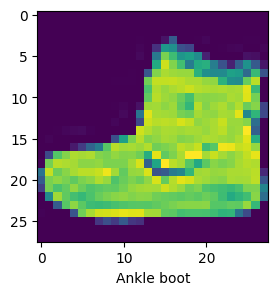

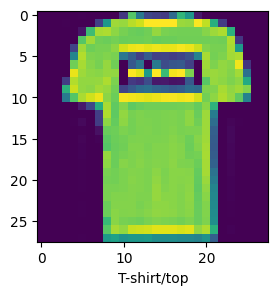

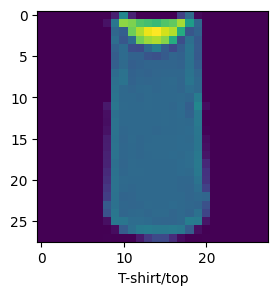

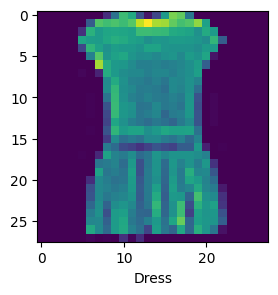

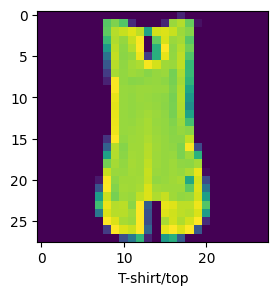

In [6]:
for i in range(5):
  plot_sample(i)

In [7]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [8]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [9]:
model = get_model(2)
model.fit(train_images_scaled, train_labels, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7881 - loss: 0.5806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8677 - loss: 0.3608
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8819 - loss: 0.3216
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8869 - loss: 0.3020
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8977 - loss: 0.2742


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicted label: Trouser


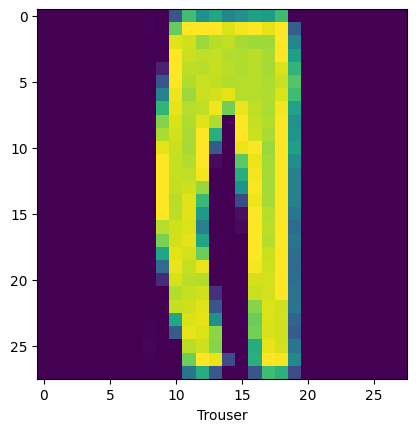

In [10]:
predictions = model.predict(test_images_scaled)
predicted_label = np.argmax(predictions[2])  # Get the predicted class index
print("predicted label:", class_names[predicted_label])
plt.figure()  # Create a new figure
plt.imshow(test_images[2])  # Display the image
plt.xlabel(class_names[predicted_label])  # Show predicted label
plt.show()

5 Epocs performance comparison for 1 hidden laye

In [11]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7853 - loss: 0.5996
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8689 - loss: 0.3568
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8826 - loss: 0.3205
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8919 - loss: 0.2931
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8983 - loss: 0.2786
49.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7856 - loss: 0.6011
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8669 - loss: 0.3687
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8817 - loss: 0.3215
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8894 - loss: 0.3000
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8962 - loss: 0.2796
25.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


5 Epocs performance comparison with 5 hidden layers

In [13]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7624 - loss: 0.6407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8567 - loss: 0.3970
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8722 - loss: 0.3585
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8809 - loss: 0.3327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8890 - loss: 0.3054
2min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7611 - loss: 0.6528
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8585 - loss: 0.3904
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8727 - loss: 0.3501
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8788 - loss: 0.3297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8838 - loss: 0.3110
46.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
